In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections as col
import numpy as np 
import time
import json
import requests
import datetime as dt

## Import and inspect data

In [2]:
oil_df = pd.read_csv('oildataRAW.csv')
price_df = pd.read_csv('price_per_barrel_01042010-01312017.csv')
#note that I removed the first three text columns so that the csv could be read properly(js)

In [3]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [4]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

## Sort by Cost

In [5]:
df_byCost = oil_df.sort_values(by=['All Costs'], ascending=False)
info = ['Accident Year','Operator Name','Accident City', 'Accident State', 'Cause Category'
       ,'Cause Subcategory','All Costs']

In [6]:
type(df_byCost)

pandas.core.frame.DataFrame

In [7]:
cost_op = df_byCost.groupby('Operator Name')['All Costs'].sum().sort_values(ascending=False)

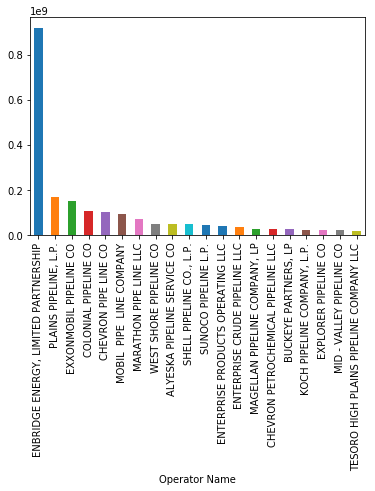

In [8]:
cost_op.head(20).plot.bar()
#make this look better. maybe use seaborn. 

In [9]:
cost_st = df_byCost.groupby('Accident State')['All Costs'].sum().sort_values(ascending=False)

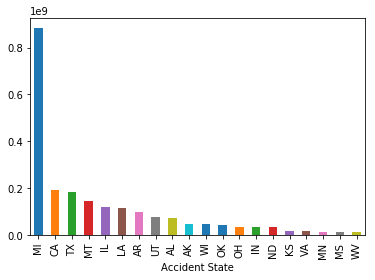

In [10]:
cost_st.head(20).plot.bar()

## MOST COMMON "SPILLERS"

In [11]:
most_common = col.Counter(oil_df["Operator ID"].values)
ids = [x[0] for x in most_common.most_common(20)]

hXvalue = []
hvalues = []
hlabels = []

for j,i in enumerate(ids):
    hXvalue.append(j+1)
    hvalues.append(most_common[i])
    hlabels.append(" or ".join(oil_df['Operator Name'].loc[oil_df['Operator ID'] == i].unique()))

hlabels,hvalues

spillers = dict(zip(hlabels, hvalues))

In [12]:
spillers = {'operator': hlabels, 'spills': hvalues}
spillers = pd.DataFrame.from_dict(spillers)

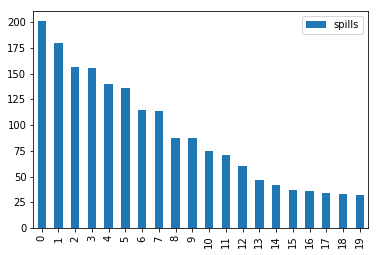

In [13]:
spillers.plot.bar()

In [14]:
spillers

,operator,spills
0,"TEPPCO CRUDE PIPELINE, LLC or ENTERPRISE CRUDE...",201
1,SUNOCO PIPELINE L.P.,180
2,"PLAINS PIPELINE, L.P.",156
3,ENTERPRISE PRODUCTS OPERATING LLC,155
4,"MAGELLAN PIPELINE COMPANY, LP",140
5,COLONIAL PIPELINE CO,136
6,"BUCKEYE PARTNERS, LP",115
7,CONOCOPHILLIPS or PHILLIPS 66 PIPELINE LLC,114
8,"KINDER MORGAN LIQUID TERMINALS, LLC",87
9,MARATHON PIPE LINE LLC,87


### MOST COMMON SPILL CAUSES

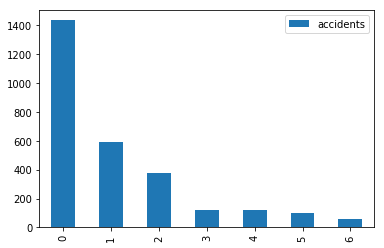

In [15]:
spill_causes = col.Counter(oil_df["Cause Category"].values)
ids2 = [x[0] for x in spill_causes.most_common(10)]
hXvalue2 = []
hvalues2 = []
hlabels2 = []

for j,i in enumerate(ids2):
    hXvalue2.append(j+1)
    hvalues2.append(spill_causes[i])
    hlabels2.append(i)

hlabels2, hvalues2

causes = dict(zip(hlabels2, hvalues2))
causes = {'cause': hlabels2, 'accidents': hvalues2}
causes = pd.DataFrame.from_dict(causes)
causes.plot.bar()

In [16]:
causes

,accidents,cause
0,1435,MATERIAL/WELD/EQUIP FAILURE
1,592,CORROSION
2,378,INCORRECT OPERATION
3,118,NATURAL FORCE DAMAGE
4,118,ALL OTHER CAUSES
5,97,EXCAVATION DAMAGE
6,57,OTHER OUTSIDE FORCE DAMAGE


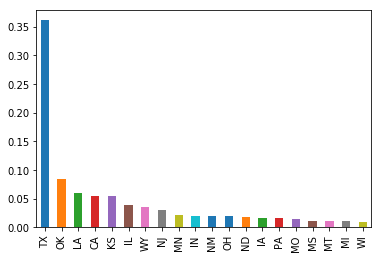

In [17]:
spills_per_state_percentage = oil_df["Accident State"].value_counts(normalize=True).sort_values(ascending=False);
spills_per_state_number = oil_df["Accident State"].value_counts()
spills_per_state_percentage
# spills_per_state_number
spills_per_state_percentage.head(20).plot.bar();

## By state
 - Property damage
 - Non-accident states

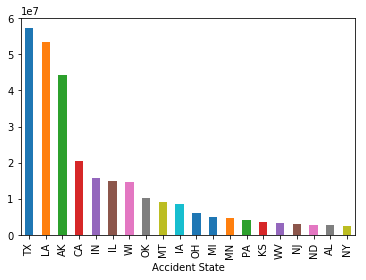

In [18]:
property_damage = oil_df.groupby("Accident State")["Property Damage Costs"].sum().sort_values(ascending=False)
property_damage.head(20).plot.bar();

In [19]:
oil_df['Accident State'].factorize()

(array([ 0,  1,  2, ...,  6, 20,  4]),
 Index(['KS', 'ME', 'LA', 'WI', 'TX', 'ND', 'OK', 'IL', 'MN', 'NY', 'CA', 'IN',
        'CO', 'MS', 'NJ', 'WA', 'IA', 'NC', 'MO', 'NM', 'PA', 'FL', 'VA', 'WY',
        'KY', 'TN', 'MI', 'ID', 'GA', 'NV', 'OH', 'SD', 'AK', 'SC', 'UT', 'NE',
        'MT', 'AL', 'AR', 'MD', 'PR', 'CT', 'OR', 'WV', 'HI', 'MA'],
       dtype='object'))

In [20]:
states = ['KS', 'ME', 'LA', 'WI', 'TX', 'ND', 'OK', 'IL', 'MN', 'NY', 'CA', 'IN',
        'CO', 'MS', 'NJ', 'WA', 'IA', 'NC', 'MO', 'NM', 'PA', 'FL', 'VA', 'WY',
        'KY', 'TN', 'MI', 'ID', 'GA', 'NV', 'OH', 'SD', 'AK', 'SC', 'UT', 'NE',
        'MT', 'AL', 'AR', 'MD', 'PR', 'CT', 'OR', 'WV', 'HI', 'MA']
len(states)

46

In [21]:
states_2 = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
non_accident_states = list(set(states_2) - set(states))
non_accident_states

['DC', 'VT', 'NH', 'RI', 'AZ', 'DE']

In [22]:
accident_causes = oil_df.groupby("Accident State")["Cause Subcategory"].value_counts()
accident_causes["HI"]

Cause Subcategory
EXTERNAL                                2
THREADED CONNECTION/COUPLING FAILURE    1
Name: Cause Subcategory, dtype: int64

## Fatalities

In [23]:
oil_df['All Fatalities'].sum()

10.0

In [24]:
oil_df['All Fatalities'].max()

2.0

In [25]:
oil_df.loc[oil_df['All Fatalities'] == 2]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
758,20120098,17932,2012,3/3/2012 2:04 AM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",LINE 64,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,2.0,2.0,864819.0,124500.0,0.0,915512.0,931946.0,0.0,2836777
2730,20160391,21890,2016,10/31/2016 2:51 PM,2552,COLONIAL PIPELINE CO,LINE 01,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
worst_fatalty_daysworst_fa  = oil_df.loc[oil_df['All Fatalities'] == 2]['Accident Date/Time']
oil_df.loc[oil_df['All Fatalities'] == 2]['Accident Date/Time']

758       3/3/2012 2:04 AM
2730    10/31/2016 2:51 PM
Name: Accident Date/Time, dtype: object

## Injuries

In [27]:
oil_df['All Injuries'].sum()

20.0

In [28]:
oil_df['All Injuries'].max()

4.0

In [29]:
oil_df.loc[oil_df['All Injuries'] == 4]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
2730,20160391,21890,2016,10/31/2016 2:51 PM,2552,COLONIAL PIPELINE CO,LINE 01,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
worst_injury_days = oil_df.loc[oil_df['All Injuries'] == 2]['Accident Date/Time']
oil_df.loc[oil_df['All Injuries'] == 2]['Accident Date/Time']

1385    9/30/2013 6:45 PM
Name: Accident Date/Time, dtype: object

## Other distributions and counts

In [31]:
liquid_type = oil_df["Liquid Type"].value_counts()
liquid_type

CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64

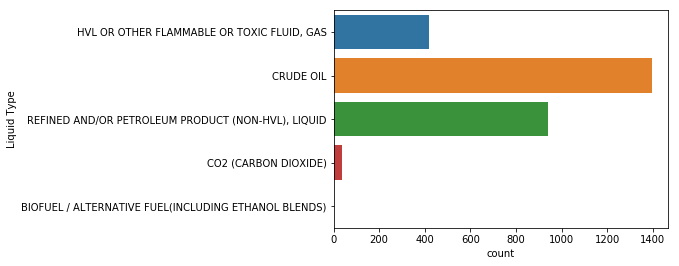

In [32]:
cp = sns.countplot(y=oil_df['Liquid Type'], data=oil_df)

In [33]:
location = oil_df["Pipeline Location"].value_counts()
location

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [34]:
pipeline_type = oil_df["Pipeline Type"].value_counts()
pipeline_type

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

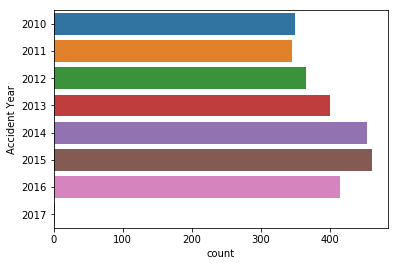

In [35]:
cpy = sns.countplot(y=oil_df['Accident Year'], data=oil_df)

## Causes and subcauses
(industry as a whole)

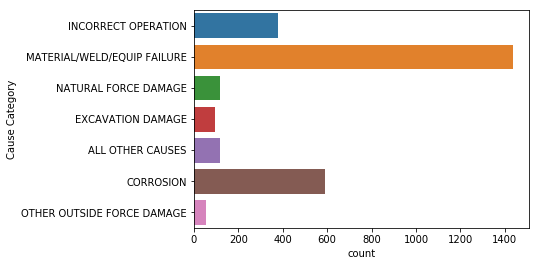

In [36]:
cp = sns.countplot(y=oil_df['Cause Category'], data=oil_df)

In [37]:
oil_df_n = oil_df.rename(columns={'Cause Subcategory': 'cause_subcategory', 'Net Loss (Barrels)': 'net_loss', 'Pipeline/Facility Name': 'pipeline'})

In [38]:
plt.rcParams['figure.figsize']=(20,15)
plt.rcParams['axes.labelsize']=12
#remap key values

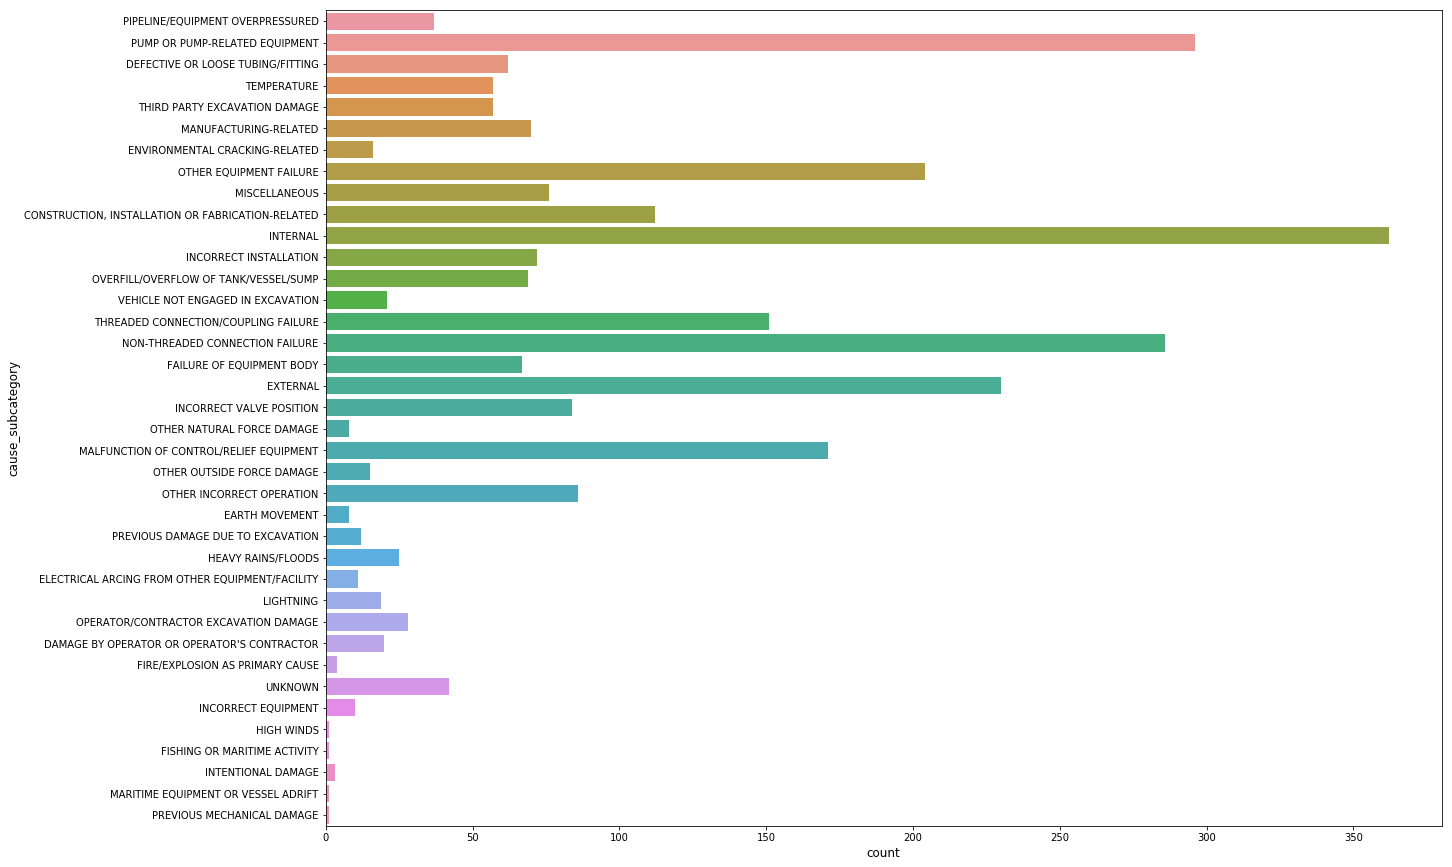

In [39]:
sns.countplot(y=oil_df_n['cause_subcategory'], data=oil_df_n);
#loss in barrels

In [40]:
df_sm = oil_df_n[['net_loss','cause_subcategory']]

In [41]:
subcat = df_sm.groupby('cause_subcategory').sum()

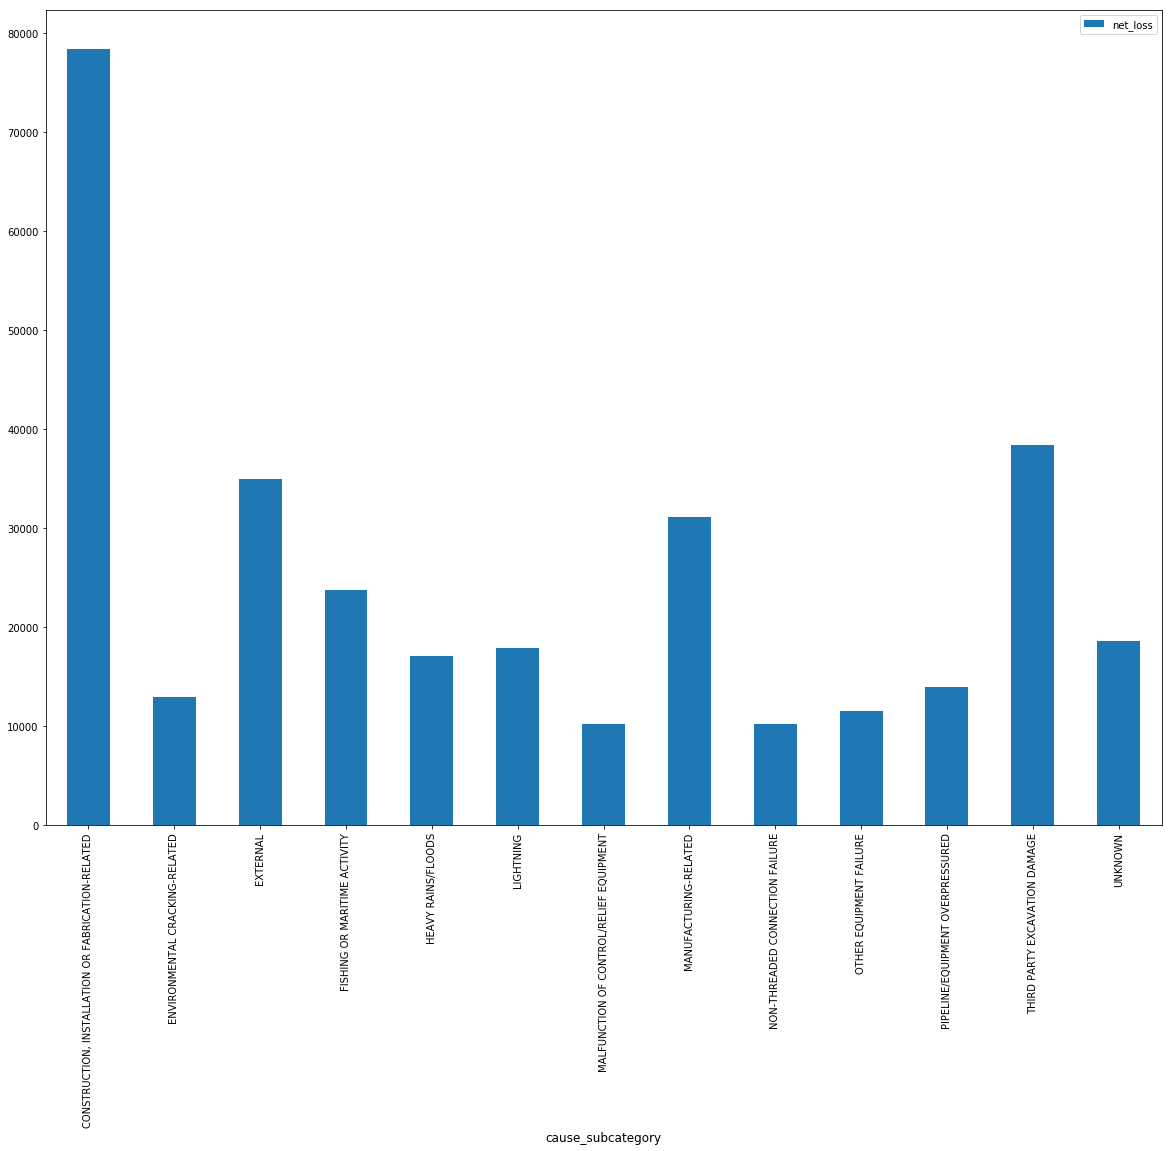

In [42]:
subcat.query('net_loss > 10000').plot.bar();
#TODO sort these values - fix this

## Price distribution

In [43]:
pricedf = price_df.rename(columns={'Series ID: PET.RWTC.D Dollars per Barrel': 'ppb'})
pricedf = pricedf.dropna()
pricedf['Day'] = pd.to_datetime(pricedf.Day)
pricedf = pricedf.sort_values('Day')

In [44]:
pricedf.head()

,Day,ppb
1784,2010-01-04,81.52
1783,2010-01-05,81.74
1782,2010-01-06,83.12
1781,2010-01-07,82.60
1780,2010-01-08,82.74


In [45]:
pricedf.shape

(1785, 2)

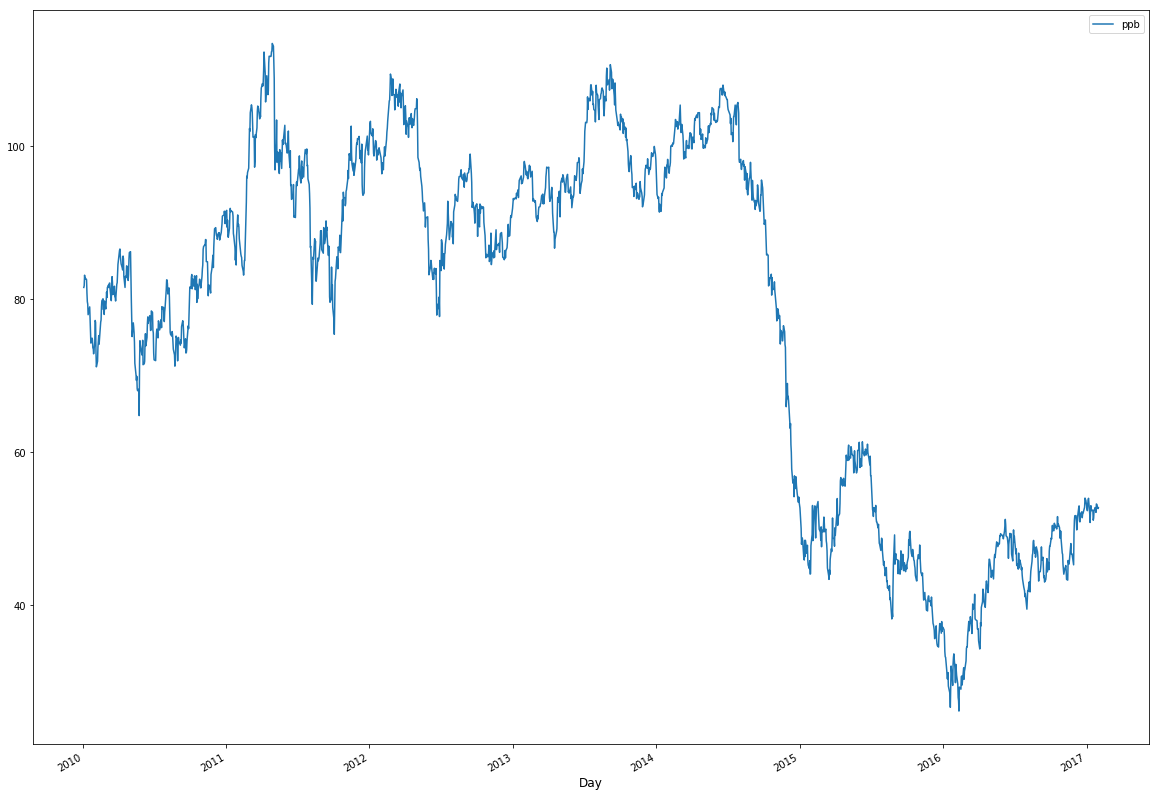

In [46]:
pricedf.plot(x='Day', y='ppb');
#on same thing plot number of accidents

## Merge the datasets

In [47]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [48]:
oil_df['Accident Date/Time'].dtype

dtype('O')

In [49]:
oil_df['accident_date'] = pd.to_datetime(oil_df['Accident Date/Time'])

In [50]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,2010-01-01 07:15:00
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008,2010-01-04 08:30:00
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,2010-01-05 10:30:00
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540,2010-01-06 19:30:00
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,2010-01-07 13:00:00


In [51]:
oil_df['accident_date'] = oil_df['accident_date'].dt.date

In [52]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,2010-01-01
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008,2010-01-04
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,2010-01-05
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540,2010-01-06
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,2010-01-07


In [53]:
oil_df['accident_date'].dtype

dtype('O')

In [54]:
oil_df['accident_date'] = pd.to_datetime(oil_df['accident_date'])

In [55]:
oil_df['accident_date'].dtype

dtype('<M8[ns]')

In [56]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,2010-01-01
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008,2010-01-04
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,2010-01-05
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540,2010-01-06
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,2010-01-07


## Specific spills

In [57]:
mask_mar = (oil_df['accident_date'] == '2014-03-14')

In [58]:
mar = oil_df[mask_mar]

In [59]:
mar

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
1573,20140140,20598,2014,3/14/2014 12:30 AM,1845,"BUCKEYE PARTNERS, LP",163,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,232972.0,0.0,0.0,1006918.0,747951.0,0.0,1987841,2014-03-14
1574,20140271,20599,2014,3/14/2014 12:30 AM,1845,"BUCKEYE PARTNERS, LP",162,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,252249.0,0.0,0.0,1006918.0,747951.0,0.0,2007118,2014-03-14
1575,20140137,19554,2014,3/14/2014 1:13 PM,18718,SUNOCO PIPELINE L.P.,CORSICANA STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,100.0,50.0,0.0,2800.0,0.0,0.0,2950,2014-03-14


In [60]:
oil_df.loc[oil_df['accident_date'] == '2016-04-02']

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
2490,20160135,22043,2016,4/2/2016 12:32 PM,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE PIPELINE,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,1446227.0,11620.0,732618.0,1608352.0,5269522.0,0.0,9068339,2016-04-02


In [61]:
oil_df.loc[oil_df['Pipeline/Facility Name'] == 'COLONIAL']

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
278,20100276,18419,2010,11/8/2010 11:15 AM,2552,COLONIAL PIPELINE CO,COLONIAL,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,49955.0,45.0,0.0,0.0,0.0,30000.0,80000,2010-11-08
505,20110216,18400,2011,6/13/2011 2:30 PM,2552,COLONIAL PIPELINE CO,COLONIAL,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,28489.0,99.0,0.0,0.0,0.0,0.0,28588,2011-06-13


In [134]:
oil_df.loc[oil_df['accident_date'] == '2013-04-15']
#north dakota tioga

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,weekday
1201,20130168,18027,2013,2013-04-15 14:00:00,30825,CITGO PETROLEUM CORPORATION (REFINERY),C3 MIX HVL PIPELINE,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,33000.0,286.0,0.0,0.0,0.0,0.0,33286,2013-04-15,Mon


In [63]:
oil_df.loc[oil_df['Accident State'] == 'ND']

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
5,20100021,17161,2010,1/8/2010 11:38 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",NaN,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,76940.0,167775.0,150000.0,1800000.0,2000000.0,0.0,4194715,2010-01-08
33,20100084,17313,2010,1/28/2010 11:00 AM,1248,BELLE FOURCHE PIPELINE CO,DICKINSON GATHERING,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,500.0,420.0,0.0,750.0,9500.0,0.0,11170,2010-01-28
116,20100086,17994,2010,5/10/2010 8:00 AM,31570,TESORO - HIGH PLAINS PIPELINE COMPANY,TIOGA HIGH PLAINS PIPELINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,100.0,0.0,0.0,0.0,5000.0,0.0,5100,2010-05-10
150,20100115,17631,2010,6/7/2010 8:00 AM,15774,ENBRIDGE PIPELINES (NORTH DAKOTA) LLC,GRENORA STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,4700.0,70.0,0.0,300.0,1000.0,4000.0,10070,2010-06-07
219,20100190,17282,2010,8/20/2010 9:45 AM,15774,ENBRIDGE PIPELINES (NORTH DAKOTA) LLC,SHERWOOD STATION,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,0.0,25.0,0.0,0.0,0.0,11000.0,11025,2010-08-20
323,20110007,17413,2010,12/7/2010 9:35 AM,22610,"MAGELLAN PIPELINE COMPANY, LP",FARGO TANK FARM,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,1000.0,200.0,0.0,2000.0,2500.0,0.0,5700,2010-12-07
418,20110092,17633,2011,2/25/2011 8:25 AM,15774,ENBRIDGE PIPELINES (NORTH DAKOTA) LLC,MINOT STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,0.0,0.0,0.0,0.0,3000.0,0.0,3000,2011-02-25
456,20110136,15794,2011,4/13/2011 2:06 PM,32258,KINDER MORGAN COCHIN LLC,MAINLINE VALVE SITE 889,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,1840.0,102.0,0.0,630.0,0.0,0.0,2572,2011-04-13
474,20110171,17792,2011,5/7/2011 6:20 AM,32334,TC OIL PIPELINE OPERATIONS INC,LUDDEN PUMP STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,25000.0,40000.0,1000.0,250000.0,750000.0,250000.0,1316000,2011-05-07
608,20110393,19345,2011,9/25/2011 6:30 PM,15774,ENBRIDGE PIPELINES (NORTH DAKOTA) LLC,BERTHOLD STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,150.0,1600.0,0.0,2500.0,225000.0,0.0,229250,2011-09-25


In [64]:
oil_df_n[oil_df_n.pipeline.str.contains("COLONIAL")==True]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,pipeline,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
278,20100276,18419,2010,11/8/2010 11:15 AM,2552,COLONIAL PIPELINE CO,COLONIAL,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,49955.0,45.0,0.0,0.0,0.0,30000.0,80000
295,20100301,18056,2010,11/20/2010 8:30 AM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",CARTERET TERMINAL IN PLANT COLONIAL CONNECTION,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,0.0,200.0,0.0,5500.0,6000.0,0.0,11700
505,20110216,18400,2011,6/13/2011 2:30 PM,2552,COLONIAL PIPELINE CO,COLONIAL,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,28489.0,99.0,0.0,0.0,0.0,0.0,28588
558,20110317,18399,2011,8/10/2011 8:00 AM,2552,COLONIAL PIPELINE CO,COLONIAL PAULDING PUMP STATION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,111000.0,994.0,0.0,16000.0,0.0,0.0,127994
630,20110411,18398,2011,10/14/2011 7:45 PM,2552,COLONIAL PIPELINE CO,COLONIAL/BELTON JUNCTION,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,15000.0,56.0,0.0,2000.0,400.0,0.0,17456
669,20120001,18397,2011,12/6/2011 3:45 AM,2552,COLONIAL PIPELINE CO,COLONIAL/OXFORD STATION,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,20000.0,10000.0,3200.0,300000.0,500000.0,0.0,833200
683,20120002,18396,2011,12/12/2011 10:16 AM,2552,COLONIAL PIPELINE CO,COLONIAL/ GREENSBORO JUNCTION,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,2456.0,415.0,0.0,15000.0,4743.0,0.0,22614
704,20120039,18129,2012,1/14/2012 6:00 AM,2552,COLONIAL PIPELINE CO,COLONIAL/ATLANTA JUNCTION,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,0.0,40.0,0.0,10000.0,0.0,0.0,10040
709,20120040,18454,2012,1/18/2012 8:00 AM,2552,COLONIAL PIPELINE CO,COLONIAL/BELTON JUNCTION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,550000.0,32000.0,0.0,64000.0,454000.0,0.0,1100000
711,20120047,18128,2012,1/20/2012 7:00 AM,2552,COLONIAL PIPELINE CO,COLONIAL/PAULDING STATION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,32535.0,120.0,0.0,59868.0,0.0,0.0,92523


In [65]:
oil_df_n[oil_df_n.pipeline.str.contains("KEYSTONE")==True]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,pipeline,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
2490,20160135,22043,2016,4/2/2016 12:32 PM,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE PIPELINE,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,1446227.0,11620.0,732618.0,1608352.0,5269522.0,0.0,9068339
2790,20170015,22020,2016,12/27/2016 8:40 AM,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,0.0,15.0,0.0,0.0,61000.0,0.0,61015


In [66]:
# colonialmask = oil_df_n.pipeline.apply(lambda value: True if 'COLONIAL' in value else False)
#this worked in the subway delays. not sure what's up now. 

In [67]:
pricedf.dtypes

Day    datetime64[ns]
ppb           float64
dtype: object

In [68]:
# oil_df = oil_df.sort_values('accident_date')

In [123]:
joined = pd.merge(oil_df, pricedf, how='left', left_on='accident_date', right_on='Day')
# joined = pd.merge(oil_df, pricedf, how='outer', left_on='accident_date', right_on='Day')
# joined.shape = (3317, 51)

In [124]:
sampledf = joined.sample(20)

In [125]:
sampledf

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,Day,ppb
653,20110449,17139,2011,11/14/2011 2:57 AM,1248,BELLE FOURCHE PIPELINE CO,NaN,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,15830.0,282301.0,17000.0,2000.0,1555415.0,0.0,1872546,2011-11-14,2011-11-14,98.14
726,20120062,18808,2012,2/6/2012 2:09 PM,1845,"BUCKEYE PARTNERS, LP",HAMMOND TERMINAL,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,19230.0,0.0,0.0,6000.0,0.0,1998.0,27228,2012-02-06,2012-02-06,96.89
1591,20140155,21155,2014,3/21/2014 10:25 PM,15674,PLANTATION PIPE LINE CO,14 CNF,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,55000.0,5000.0,0.0,131500.0,329500.0,0.0,521000,2014-03-21,2014-03-21,99.97
1915,20150028,20086,2014,12/30/2014 4:06 PM,31618,ENTERPRISE PRODUCTS OPERATING LLC,SHOUP PLANT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,2800.0,7600.0,0.0,1000.0,0.0,0.0,11400,2014-12-30,2014-12-30,54.14
1302,20130268,18854,2013,7/11/2013 4:00 PM,18718,SUNOCO PIPELINE L.P.,BRJT-CDJT-8,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,2000.0,0.0,2000.0,51540.0,0.0,0.0,55540,2013-07-11,2013-07-11,104.77
1407,20130377,18769,2013,10/29/2013 4:00 PM,4805,EXPLORER PIPELINE CO,"DECATUR, IL PUMP STATION",ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,1000.0,150.0,0.0,15000.0,0.0,0.0,16150,2013-10-29,2013-10-29,98.29
2513,20160158,21392,2016,4/26/2016 7:16 AM,32117,"ENLINK PROCESSING SERVICES, LLC",CROSSROADS STATION,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,500.0,1300.0,0.0,0.0,0.0,0.0,1800,2016-04-26,2016-04-26,42.52
1215,20130189,19160,2013,4/30/2013 1:40 PM,12628,MOBIL PIPE LINE COMPANY,PEGASUS PIPELINE SYSTEM,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,100.0,5000.0,75000.0,143000.0,50000.0,273100,2013-04-30,2013-04-30,93.22
2097,20150217,20513,2015,5/13/2015 8:29 AM,300,"PLAINS PIPELINE, L.P.",WICHITA FALLS PL,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,57.0,0.0,3437.0,0.0,0.0,3494,2015-05-13,2015-05-13,60.50
2291,20150403,21319,2015,10/15/2015 7:45 AM,18718,SUNOCO PIPELINE L.P.,GOODRICH STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,10000.0,428.0,0.0,8200.0,104956.0,0.0,123584,2015-10-15,2015-10-15,46.38


In [127]:
joined.isnull().sum()

Report Number                              0
Supplemental Number                        0
Accident Year                              0
Accident Date/Time                         0
Operator ID                                0
Operator Name                              0
Pipeline/Facility Name                   121
Pipeline Location                          0
Pipeline Type                             18
Liquid Type                                0
Liquid Subtype                          1446
Liquid Name                             2573
Accident City                            315
Accident County                           75
Accident State                            12
Accident Latitude                          0
Accident Longitude                         0
Cause Category                             0
Cause Subcategory                          0
Unintentional Release (Barrels)            0
Intentional Release (Barrels)           1586
Liquid Recovery (Barrels)                  0
Net Loss (

In [126]:
joined.shape

(2795, 51)

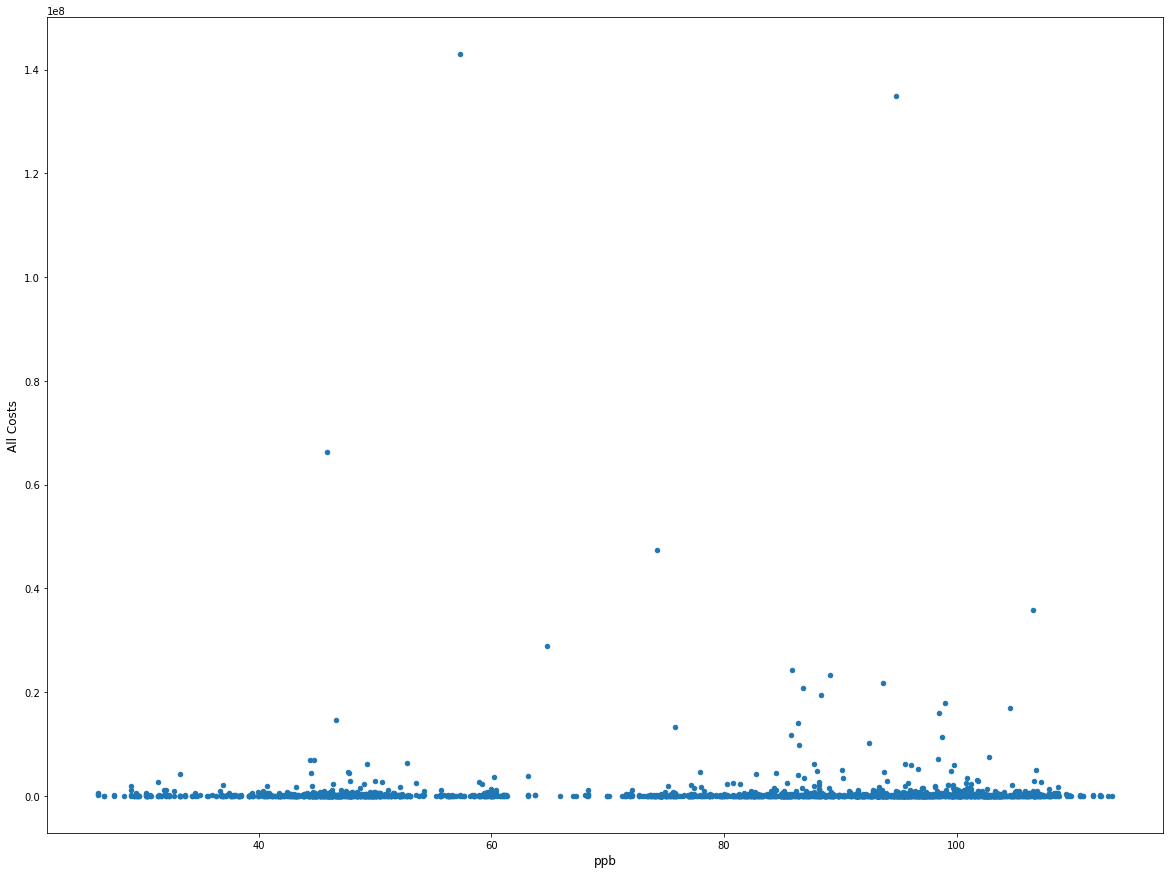

In [72]:
joined.plot.scatter(x='ppb', y='All Costs')

In [73]:
#group by months
joined['month'] = joined['accident_date'].dt.strftime("%b")
joined['year'] = joined['accident_date'].dt.strftime("%y")

In [74]:
joined.sample(10)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,Day,ppb,month,year
818,20120358,19699,2012,11/13/2012 8:35 AM,15774,ENBRIDGE PIPELINES (NORTH DAKOTA) LLC,ENBRIDGE PIPELINES (NORTH DAKOTA) LLC/MINOT STN,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,734805.0,925936.0,0.0,2403151,2012-11-13,2012-11-13,85.38,Nov,12
1906,20160009,21051,2015,12/17/2015 1:12 PM,32109,"ONEOK NGL PIPELINE, LLC","ONEOK #1 10"" LAKE COLORADO CITY TO CR 349",ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,0.0,50.0,300.0,0.0,140953,2015-12-17,2015-12-17,34.98,Dec,15
1917,20160022,21094,2016,1/8/2016 6:47 AM,300,"PLAINS PIPELINE, L.P.",CHINA GROVE,ONSHORE,TANK,CRUDE OIL,...,0.0,16400.0,0.0,0.0,22925,2016-01-08,2016-01-08,33.20,Jan,16
1116,20130341,19215,2013,9/23/2013 12:51 PM,12105,"MAGELLAN AMMONIA PIPELINE, L.P.",POCAHONTAS TO LUVERNE LINE,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,2400.0,12000.0,30000.0,0.0,50266,2013-09-23,2013-09-23,103.62,Sep,13
2110,20160264,21638,2016,7/28/2016 2:25 PM,300,"PLAINS PIPELINE, L.P.",ALAMITOS,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,3500.0,0.0,0.0,4300,2016-07-28,2016-07-28,41.13,Jul,16
1476,20140411,20138,2014,11/4/2014 6:50 AM,18718,SUNOCO PIPELINE L.P.,GRISSOM STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,0.0,500.0,0.0,500,2014-11-04,2014-11-04,77.15,Nov,14
446,20110329,16168,2011,8/8/2011 11:27 AM,32109,ONEOK NGL PIPELINE LP,ONEOK NORTH SYSTEM PIPELINE,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,1000.0,40000.0,20000.0,0.0,411277,2011-08-08,2011-08-08,81.27,Aug,11
1748,20150289,20828,2015,7/30/2015 4:17 PM,2552,COLONIAL PIPELINE CO,CPC / HEBERT STATION,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,5000.0,0.0,0.0,30000,2015-07-30,2015-07-30,48.53,Jul,15
2217,20160413,21953,2016,11/16/2016 1:41 PM,32109,"ONEOK NGL PIPELINE, LLC",ONEOK SCURRY LATERAL,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,0.0,150.0,0.0,4029.0,11079,2016-11-16,2016-11-16,45.56,Nov,16
1368,20140259,19812,2014,6/24/2014 6:30 AM,32551,"BKEP PIPELINE, LLC",NaN,ONSHORE,TANK,CRUDE OIL,...,0.0,2780.0,0.0,0.0,2830,2014-06-24,2014-06-24,106.64,Jun,14


In [75]:
time_price = joined[['month', 'year', 'ppb']]

In [76]:
time_price.sample(20)

,month,year,ppb
1146,Nov,13,94.74
2122,Aug,16,43.06
2210,Nov,16,44.96
960,Apr,13,95.02
2146,Aug,16,46.97
1466,Oct,14,80.52
1231,Feb,14,102.54
1632,Apr,15,51.63
2031,May,16,44.58
665,Apr,12,103.72


In [77]:
tp = time_price.groupby(['year', 'month'])['ppb'].mean()
# .sort_values(ascending=False)

In [78]:
ap = time_price.groupby(['year', 'month'])['ppb'].count()

In [79]:
ap

year  month
10    Apr      27
      Aug      26
      Dec      34
      Feb      13
      Jan      28
      Jul      22
      Jun      26
      Mar      28
      May      21
      Nov      34
      Oct       9
      Sep      23
11    Apr      20
      Aug      29
      Dec      25
      Feb      30
      Jan      22
      Jul      19
      Jun      21
      Mar      23
      May      18
      Nov      18
      Oct      27
      Sep      19
12    Apr      29
      Aug      25
      Dec      25
      Feb      27
      Jan      21
      Jul      23
               ..
14    Mar      39
      May      30
      Nov      26
      Oct      21
      Sep      27
15    Apr      34
      Aug      33
      Dec      19
      Feb      26
      Jan      35
      Jul      35
      Jun      31
      Mar      36
      May      28
      Nov      34
      Oct      41
      Sep      34
16    Apr      20
      Aug      40
      Dec      27
      Feb      34
      Jan      36
      Jul      27
      Jun      3

In [80]:
tp

year  month
10    Apr       84.606296
      Aug       76.553077
      Dec       88.879412
      Feb       76.793846
      Jan       79.390357
      Jul       76.015455
      Jun       74.528462
      Mar       80.872143
      May       72.173333
      Nov       84.450588
      Oct       82.196667
      Sep       74.838261
11    Apr      109.330500
      Aug       86.122069
      Dec       99.224000
      Feb       88.626333
      Jan       90.044545
      Jul       97.346842
      Jun       96.769048
      Mar      102.036957
      May      102.651667
      Nov       97.659444
      Oct       84.675926
      Sep       86.175263
12    Apr      102.716207
      Aug       94.538800
      Dec       88.089600
      Feb      101.875926
      Jan      100.006190
      Jul       88.127391
                  ...    
14    Mar      100.923333
      May      101.765333
      Nov       75.948462
      Oct       84.947619
      Sep       93.873333
15    Apr       54.672647
      Aug       42.521515


In [81]:
plt.rcParams['figure.figsize']=(10,9)

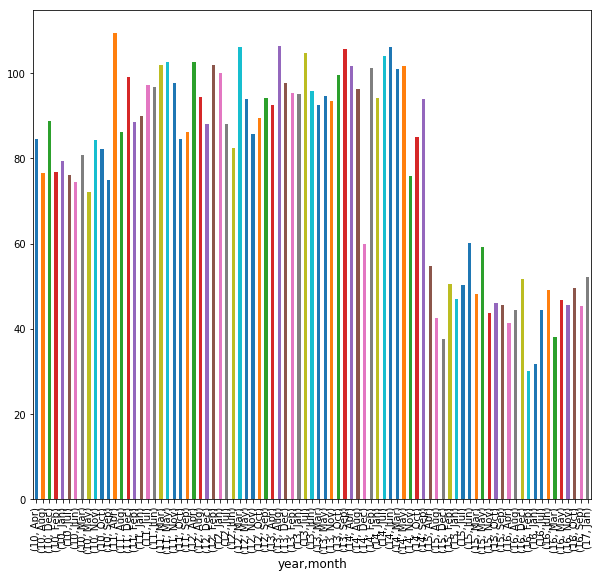

In [82]:
tp.plot.bar()

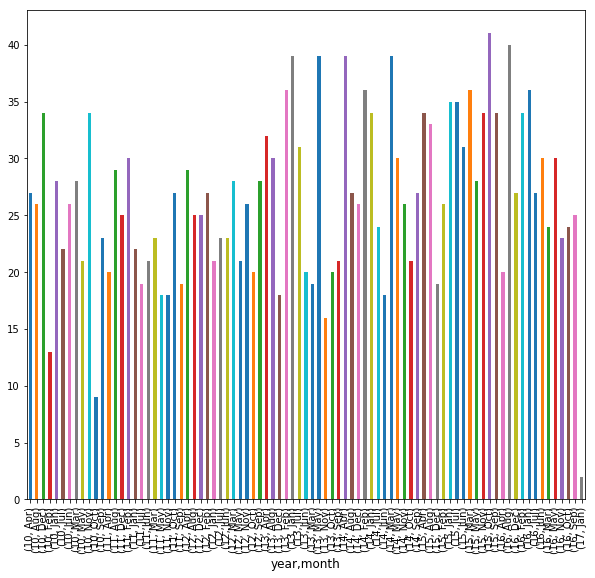

In [83]:
ap.plot.bar();

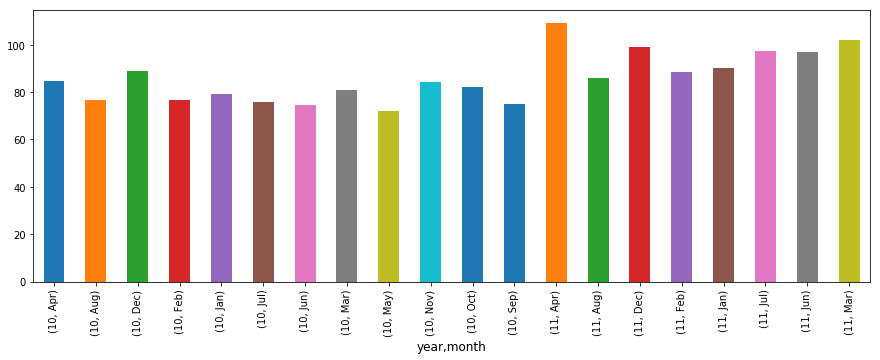

In [84]:
plt.rcParams['figure.figsize']=(15,5)
tp.head(20).plot.bar(x='month', y='ppb');
#maybe by counts - months with the most accidents

## Accidents and PPB

In [85]:
#looking at relationship between price per barrel and average number of accidents
price_df.head()
price_df.columns = ["Day", "WTI"]
price_df.head()
price_df["WTI"].describe()
price_df.head()

,Day,WTI
0,1/31/2017,52.75
1,1/30/2017,52.63
2,1/27/2017,53.18
3,1/26/2017,53.24
4,1/25/2017,52.14


# When are accidents occuring? Counts

Series.dt.dayofweek
dt.weekday

Series.dt.weekday_name
#do this on the joined df

In [86]:
joined.head(2)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,Day,ppb,month,year
0,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,0.0,0.0,0.0,4008,2010-01-04,2010-01-04,81.52,Jan,10
1,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,0.0,0.0,0.0,0.0,200,2010-01-05,2010-01-05,81.74,Jan,10


In [151]:
when = joined[['Accident Year', 'Accident Date/Time', 'Net Loss (Barrels)', 'All Costs']]

In [152]:
when.dtypes

Accident Year           int64
Accident Date/Time     object
Net Loss (Barrels)    float64
All Costs               int64
dtype: object

In [153]:
when['Accident Date/Time'] = pd.to_datetime(when['Accident Date/Time'])

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
when.dtypes

Accident Year                  int64
Accident Date/Time    datetime64[ns]
Net Loss (Barrels)           float64
All Costs                      int64
dtype: object

In [155]:
when['day_name'] = when['Accident Date/Time'].dt.weekday_name
when['time_of_day'] = when['Accident Date/Time'].dt.hour
when['day_of_month'] = when['Accident Date/Time'].dt.day
when['month'] = when['Accident Date/Time'].dt.month
when['Accident Year'] = when['Accident Year'].astype(str)


/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [156]:
when.dtypes

Accident Year                 object
Accident Date/Time    datetime64[ns]
Net Loss (Barrels)           float64
All Costs                      int64
day_name                      object
time_of_day                    int64
day_of_month                   int64
month                          int64
dtype: object

In [157]:
when.head()

,Accident Year,Accident Date/Time,Net Loss (Barrels),All Costs,day_name,time_of_day,day_of_month,month
0,2010,2010-01-01 07:15:00,21.0,1627,Friday,7,1,1
1,2010,2010-01-04 08:30:00,0.0,4008,Monday,8,4,1
2,2010,2010-01-05 10:30:00,2.0,200,Tuesday,10,5,1
3,2010,2010-01-06 19:30:00,0.0,11540,Wednesday,19,6,1
4,2010,2010-01-07 13:00:00,2.0,29650,Thursday,13,7,1


In [135]:
# plt.subplot(2,1,1) #rows, cols, plot nbr
# plt.plot(when['Accident Year'], when.groupby('Accident Year').size())

# plt.ylabel('count')

# plt.subplot(2,1,2) #rows, cols, plot nbr
# plt.plot(nums, np.sin(nums))
# plt.ylabel('sin')
# plt.xlabel('x')

In [132]:
oil_df['Accident Date/Time'] = pd.to_datetime(oil_df['Accident Date/Time'])

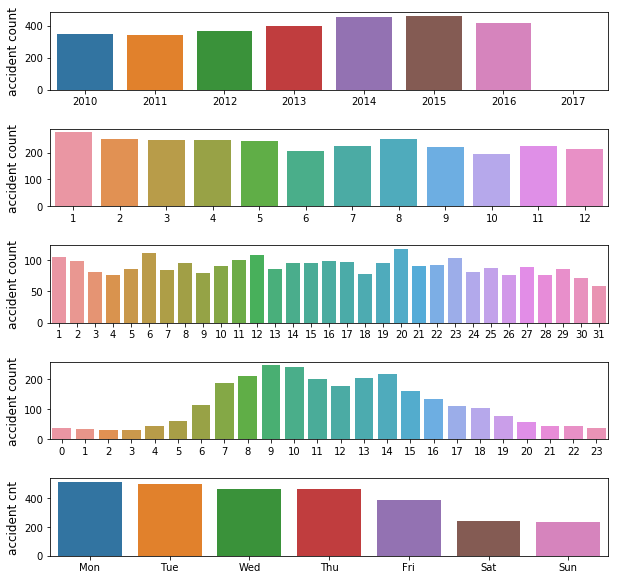

In [133]:
def Weekday(date):
    wday_dum = date.weekday()
    if wday_dum is 0:
        wday = 'Mon'
    elif wday_dum is 1:
        wday = 'Tue'
    elif wday_dum is 2:
        wday = 'Wed'
    elif wday_dum is 3:
        wday = 'Thu'
    elif wday_dum is 4:
        wday = 'Fri'
    elif wday_dum is 5:
        wday = 'Sat'
    else:
        wday = 'Sun'
    return wday

Hour = lambda x: x.hour
Day = lambda x: x.day
Month = lambda x: x.month
Year = lambda x: x.year

oil_df['weekday'] = oil_df.loc[:, "Accident Date/Time"].apply(lambda x: Weekday(x))

cat = [Year,Month,Day,Hour]
num = len(cat)
plt.figure(figsize=(10,10))
for (i, c) in enumerate(cat):
    plt.subplot(num+1,1,i+1)
    sns.countplot(oil_df["Accident Date/Time"].apply(c))
    plt.xlabel('')
    plt.ylabel('accident count')

plt.subplot(num+1,1,5)
sns.countplot(oil_df["Accident Date/Time"].apply(Weekday),order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('')
plt.ylabel('accident cnt')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.5)

## Locating Peaks from Google Trends
https://trends.google.com/trends/explore?date=2010-01-01%202017-01-31&q=pipeline%20spill

In [162]:
when.head(2)

,Accident Year,Accident Date/Time,Net Loss (Barrels),All Costs,day_name,time_of_day,day_of_month,month
0,2010,2010-01-01 07:15:00,21.0,1627,Friday,7,1,1
1,2010,2010-01-04 08:30:00,0.0,4008,Monday,8,4,1


In [166]:
mask_yr = when['Accident Year'] == '2013'
mask_apr = when['month'] == 4

all_mask = mask_yr & mask_apr

apr_thr = when[all_mask]
# when[mask_yr]

Text(0,0.5,'All Costs')

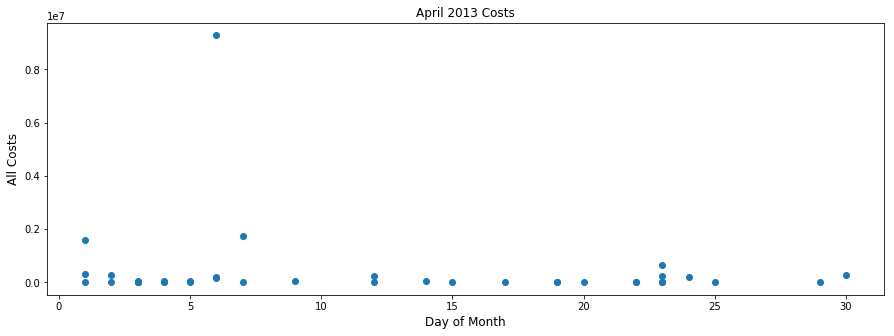

In [169]:
scatter = plt.figure()
axes1 = scatter.add_subplot(1,1,1)
axes1.scatter(apr_thr.day_of_month, apr_thr['All Costs'])

axes1.set_title('April 2013 Costs')
axes1.set_xlabel('Day of Month')
axes1.set_ylabel('All Costs')

In [174]:
oil_df.loc[oil_df['accident_date'] == '2013-04-06']
#harris pasadena texas

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,weekday
1192,20130157,19188,2013,2013-04-06 08:11:00,30829,ENTERPRISE CRUDE PIPELINE LLC,PASADENA DELIVERY TO LHR,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,2000000.0,5000.0,750000.0,500000.0,5270000.0,750000.0,9275000,2013-04-06,Sat
1193,20130162,18282,2013,2013-04-06 14:20:00,32080,"CCPS TRANSPORTATION, LLC",GUNN STATION DRAIN PIPING,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,1000.0,100.0,0.0,124000.0,75000.0,0.0,200100,2013-04-06,Sat
1194,20130255,20666,2013,2013-04-06 17:00:00,32174,MCCAIN PIPELINE COMPANY,MCCAIN PIPELINE COMPANY,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,20000.0,142.0,0.0,80000.0,50000.0,0.0,150142,2013-04-06,Sat


In [175]:
oil_df.iloc[1192]

Report Number                                                20130157
Supplemental Number                                             19188
Accident Year                                                    2013
Accident Date/Time                                2013-04-06 08:11:00
Operator ID                                                     30829
Operator Name                           ENTERPRISE CRUDE PIPELINE LLC
Pipeline/Facility Name                       PASADENA DELIVERY TO LHR
Pipeline Location                                             ONSHORE
Pipeline Type                                             UNDERGROUND
Liquid Type                                                 CRUDE OIL
Liquid Subtype                                                    NaN
Liquid Name                                                       NaN
Accident City                                                PASADENA
Accident County                                                HARRIS
Accident State      

Text(0,0.5,'All Costs')

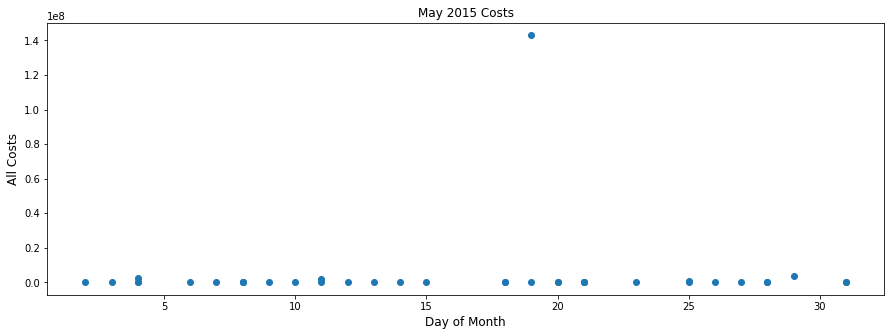

In [176]:
mask_yr_fif = when['Accident Year'] == '2015'
mask_may = when['month'] == 5

all_mask = mask_yr_fif & mask_may

may_fif = when[all_mask]
# when[mask_yr]

scatter = plt.figure()
axes1 = scatter.add_subplot(1,1,1)
axes1.scatter(may_fif.day_of_month, may_fif['All Costs'])

axes1.set_title('May 2015 Costs')
axes1.set_xlabel('Day of Month')
axes1.set_ylabel('All Costs')

In [183]:
oil_df.loc[oil_df['accident_date'] == '2015-05-19']

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,weekday
2102,20150208,20496,2015,2015-05-19 06:45:00,30829,ENTERPRISE CRUDE PIPELINE LLC,DIXIE STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,500.0,0.0,0.0,0.0,0.0,0.0,500,2015-05-19,Tue
2103,20150224,21884,2015,2015-05-19 10:57:00,300,"PLAINS PIPELINE, L.P.","LAS FLORES TO GAVIOTA 24""",ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,9868173.0,144000.0,0.0,90701042.0,22421933.0,19796736.0,142931884,2015-05-19,Tue


In [184]:
oil_df.iloc[2103]

Report Number                                            20150224
Supplemental Number                                         21884
Accident Year                                                2015
Accident Date/Time                            2015-05-19 10:57:00
Operator ID                                                   300
Operator Name                               PLAINS PIPELINE, L.P.
Pipeline/Facility Name                  LAS FLORES TO GAVIOTA 24"
Pipeline Location                                         ONSHORE
Pipeline Type                                         UNDERGROUND
Liquid Type                                             CRUDE OIL
Liquid Subtype                                                NaN
Liquid Name                                                   NaN
Accident City                                              GOLETA
Accident County                                     SANTA BARBARA
Accident State                                                 CA
Accident L

Text(0,0.5,'All Costs')

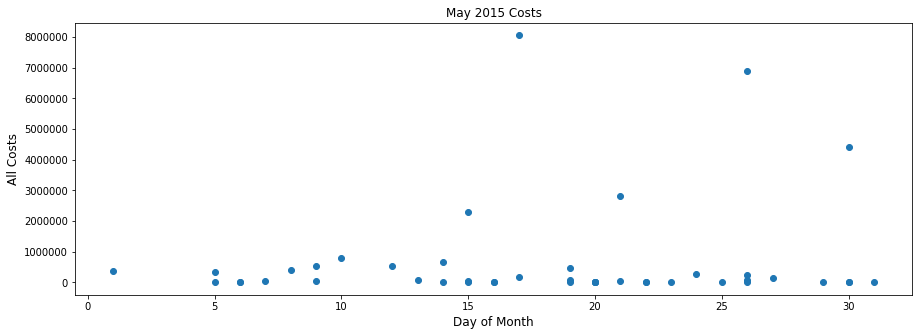

In [180]:
mask_yr_fif = when['Accident Year'] == '2015'
mask_jan = when['month'] == 1

all_mask = mask_yr_fif & mask_jan

jan_fif = when[all_mask]
# when[mask_yr]

scatter = plt.figure()
axes1 = scatter.add_subplot(1,1,1)
axes1.scatter(jan_fif.day_of_month, jan_fif['All Costs'])

axes1.set_title('May 2015 Costs')
axes1.set_xlabel('Day of Month')
axes1.set_ylabel('All Costs')

In [185]:
oil_df.loc[oil_df['accident_date'] == '2015-01-17']

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,weekday
1935,20150048,21562,2015,2015-01-17 10:15:00,31878,BRIDGER PIPELINE LLC,BRIDGER PIPELINE,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,2453123.0,40380.0,150224.0,2866610.0,2510724.0,38002.0,8059063,2015-01-17,Sat
1936,20150053,20389,2015,2015-01-17 15:28:00,15774,NORTH DAKOTA PIPELINE COMPANY LLC,LINE 81,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,153960.0,0.0,0.0,0.0,15900.0,0.0,169860,2015-01-17,Sat


In [186]:
oil_df.iloc[1935]

Report Number                                             20150048
Supplemental Number                                          21562
Accident Year                                                 2015
Accident Date/Time                             2015-01-17 10:15:00
Operator ID                                                  31878
Operator Name                                 BRIDGER PIPELINE LLC
Pipeline/Facility Name                            BRIDGER PIPELINE
Pipeline Location                                          ONSHORE
Pipeline Type                                          UNDERGROUND
Liquid Type                                              CRUDE OIL
Liquid Subtype                                                 NaN
Liquid Name                                                    NaN
Accident City                                                  NaN
Accident County                                      DAWSON COUNTY
Accident State                                                

Text(0,0.5,'All Costs')

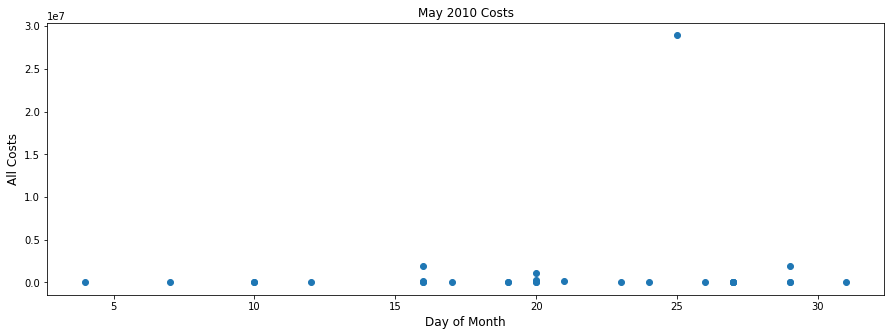

In [188]:
mask_yr_ten = when['Accident Year'] == '2010'

all_mask = mask_yr_ten & mask_may

may_ten = when[all_mask]
# when[mask_yr]

scatter = plt.figure()
axes1 = scatter.add_subplot(1,1,1)
axes1.scatter(may_ten.day_of_month, may_ten['All Costs'])

axes1.set_title('May 2010 Costs')
axes1.set_xlabel('Day of Month')
axes1.set_ylabel('All Costs')

In [189]:
oil_df.loc[oil_df['accident_date'] == '2010-05-25']

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,weekday
133,20100124,17780,2010,2010-05-25 11:00:00,26149,ALYESKA PIPELINE SERVICE CO,PUMP STATION 09,ONSHORE,TANK,CRUDE OIL,...,NaN,27000000.0,238000.0,0.0,1700000.0,0.0,0.0,28938000,2010-05-25,Tue


In [190]:
#oil_df.iloc[133]

Text(0,0.5,'All Costs')

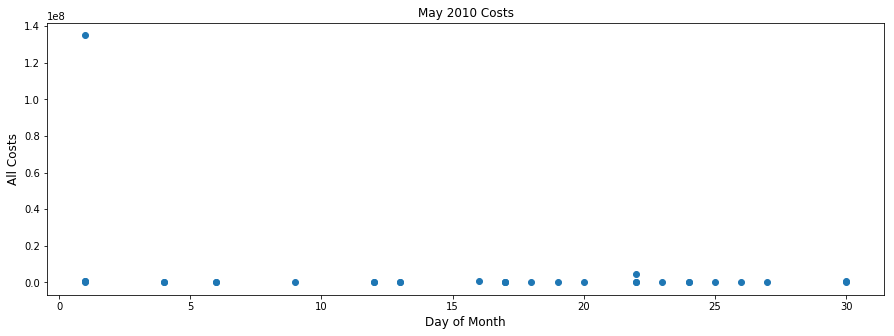

In [191]:
mask_yr_ele = when['Accident Year'] == '2011'
mask_jul = when['month'] == 7

all_mask = mask_yr_ele & mask_jul

jul_ele = when[all_mask]
# when[mask_yr]

scatter = plt.figure()
axes1 = scatter.add_subplot(1,1,1)
axes1.scatter(jul_ele.day_of_month, jul_ele['All Costs'])

axes1.set_title('May 2010 Costs')
axes1.set_xlabel('Day of Month')
axes1.set_ylabel('All Costs')

In [192]:
oil_df.loc[oil_df['accident_date'] == '2011-07-01']

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,weekday
520,20110234,17115,2011,2011-07-01 07:00:00,32103,CRIMSON PIPELINE L.P.,HUNTINGTON BEACH GATHERING,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,50000.0,2000.0,25000.0,250000.0,434000.0,150000.0,911000,2011-07-01,Fri
521,20110259,21364,2011,2011-07-01 13:23:00,12634,MOBIL CHEMICAL CO,MC-62,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,5000.0,20.0,5000.0,106417.0,0.0,516393.0,632830,2011-07-01,Fri
522,20110258,17579,2011,2011-07-01 19:52:00,12470,MID - VALLEY PIPELINE CO,HAYNESVILLE STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,3600.0,92.0,0.0,300.0,0.0,0.0,3992,2011-07-01,Fri
523,20110262,20985,2011,2011-07-01 22:40:00,4906,EXXONMOBIL PIPELINE CO,SILVERTIP TO BILLINGS 12 INCH CRUDE OIL PIPELINE,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,5000000.0,150000.0,7500000.0,100000000.0,0.0,22350000.0,135000000,2011-07-01,Fri


In [193]:
# oil_df[523]

Text(0,0.5,'All Costs')

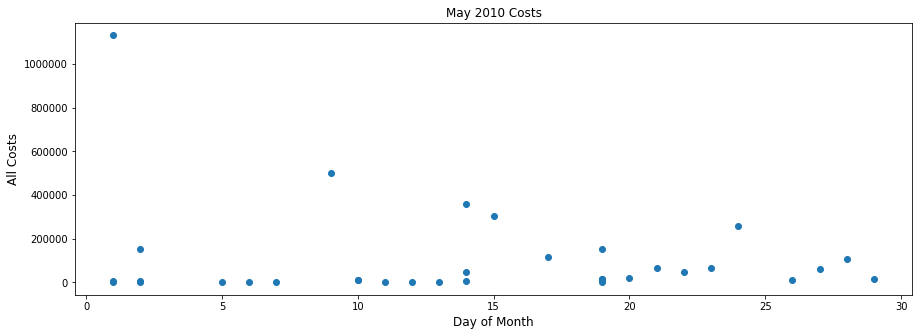

In [194]:
mask_yr_sxt = when['Accident Year'] == '2016'
mask_dec = when['month'] == 12

all_mask = mask_yr_sxt & mask_dec

dec_sxt = when[all_mask]
# when[mask_yr]

scatter = plt.figure()
axes1 = scatter.add_subplot(1,1,1)
axes1.scatter(dec_sxt.day_of_month, dec_sxt['All Costs'])

axes1.set_title('May 2010 Costs')
axes1.set_xlabel('Day of Month')
axes1.set_ylabel('All Costs')

In [195]:
oil_df.loc[oil_df['accident_date'] == '2016-12-01']

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,weekday
2760,20160426,21982,2016,2016-12-01 03:23:00,31618,ENTERPRISE PRODUCTS OPERATING LLC,NORTH PORT ARTHUR FACILITY,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,5000.0,13.0,0.0,0.0,0.0,0.0,5013,2016-12-01,Thu
2761,20160432,21998,2016,2016-12-01 03:57:00,30782,HARVEST PIPELINE COMPANY,TCV CO2 PIPELINE,ONSHORE,ABOVEGROUND,CO2 (CARBON DIOXIDE),...,NaN,50.0,1.0,0.0,0.0,0.0,0.0,51,2016-12-01,Thu
2762,20160421,21977,2016,2016-12-01 10:50:00,4906,EXXONMOBIL PIPELINE CO,LONGVIEW STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,72000.0,20000.0,0.0,900000.0,140000.0,0.0,1132000,2016-12-01,Thu


In [196]:
oil_df.iloc[2762]

Report Number                                                                    20160421
Supplemental Number                                                                 21977
Accident Year                                                                        2016
Accident Date/Time                                                    2016-12-01 10:50:00
Operator ID                                                                          4906
Operator Name                                                      EXXONMOBIL PIPELINE CO
Pipeline/Facility Name                                                   LONGVIEW STATION
Pipeline Location                                                                 ONSHORE
Pipeline Type                                                                 ABOVEGROUND
Liquid Type                                                                     CRUDE OIL
Liquid Subtype                                                                        NaN
Liquid Nam

In [197]:
price_means_df = joined.groupby(["Accident Year", pd.Grouper(key='Day', freq='BM')])['ppb'].mean()
#price means and accident means
#total accidents vs price because average doesn't make sense

In [198]:
price_means_df.head()

Accident Year  Day       
2010           2010-01-29    79.390357
               2010-02-26    76.793846
               2010-03-31    80.872143
               2010-04-30    84.606296
               2010-05-31    72.173333
Name: ppb, dtype: float64

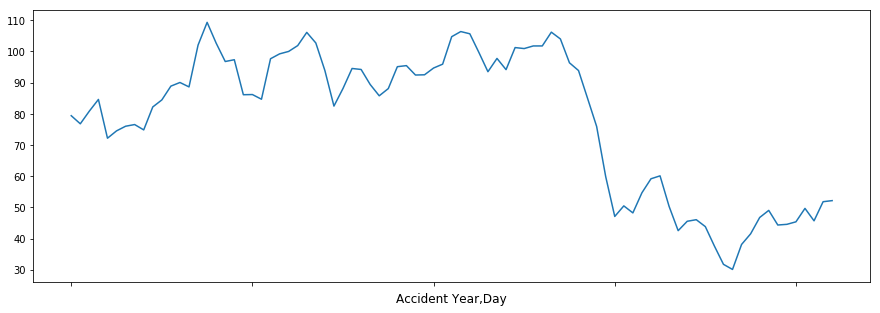

In [199]:
price_means_df.plot(x='Day', y='ppb');

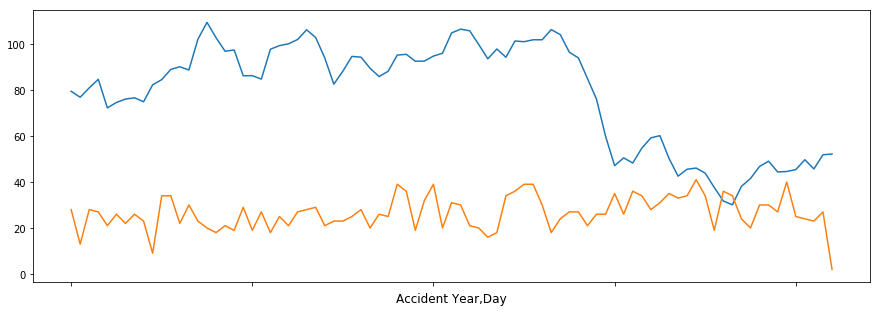

In [202]:
accident_count_df = joined.groupby(["Accident Year", pd.Grouper(key='Day', freq='BM')])['Report Number'].count()
price_means_df.plot(x='Day', y='ppb');
accident_count_df.plot(x='Day', y='count');